<a href="https://colab.research.google.com/github/aljawhara-ibrahim/Task4/blob/main/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 161MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
data = pd.read_csv("Bus_Breakdown_and_Delays.csv")

## Importing Libraries

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [21]:
data.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [24]:
data['Bus_No'] = pd.to_numeric(data['Bus_No'], errors='coerce')

In [25]:
data['Route_Number'] = pd.to_numeric(data['Route_Number'], errors='coerce')

In [6]:
data.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,34466
Route_Number,134895
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [26]:
data.drop('Incident_Number', axis=1, inplace=True)

In [50]:
# Count plots for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=data, x=column)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>


Distribution of numerical features:


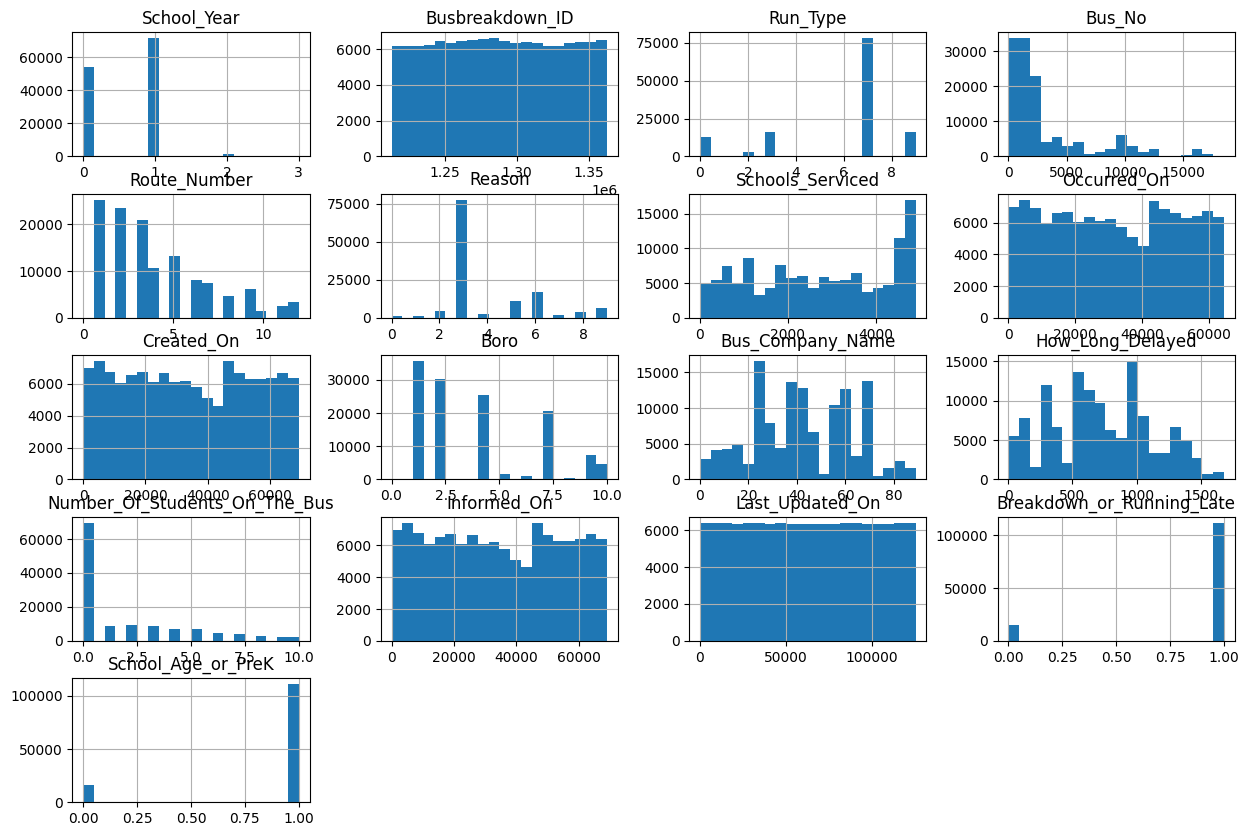

In [51]:
print("\nDistribution of numerical features:")
data.hist(bins=20, figsize=(15, 10))
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147972 non-null  object 
 1   Busbreakdown_ID                  147972 non-null  int64  
 2   Run_Type                         147883 non-null  object 
 3   Bus_No                           113506 non-null  float64
 4   Route_Number                     13077 non-null   float64
 5   Reason                           147870 non-null  object 
 6   Schools_Serviced                 147972 non-null  object 
 7   Occurred_On                      147972 non-null  object 
 8   Created_On                       147972 non-null  object 
 9   Boro                             141654 non-null  object 
 10  Bus_Company_Name                 147972 non-null  object 
 11  How_Long_Delayed                 126342 non-null  object 
 12  Nu

In [28]:
data.describe()

,Busbreakdown_ID,Bus_No,Route_Number,Number_Of_Students_On_The_Bus
count,1.479720e+05,1.135060e+05,13077.000000,147972.000000
mean,1.287779e+06,2.800394e+04,18.613596,3.590071
std,4.324338e+04,6.850916e+06,316.902424,55.365859
min,1.212681e+06,0.000000e+00,0.000000,0.000000
25%,1.250438e+06,1.001000e+03,2.000000,0.000000
50%,1.287844e+06,2.107000e+03,3.000000,0.000000
75%,1.325191e+06,8.006000e+03,6.000000,4.000000
max,1.362605e+06,2.308109e+09,12506.000000,9007.000000


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [29]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df[columns] < (Q1 - 1.5 * IQR)) |(df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Selecting numerical columns to remove outliers from
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data= remove_outliers(data, numerical_cols)

In [30]:
# Handle missing values
data['Run_Type'].fillna(method='ffill', inplace=True)
data['Run_Type'].fillna(method='bfill', inplace=True)

data['Boro'].fillna(method='ffill', inplace=True)
data['Boro'].fillna(method='bfill', inplace=True)

data['How_Long_Delayed'].fillna(method='ffill', inplace=True)
data['How_Long_Delayed'].fillna(method='bfill', inplace=True)

data['Route_Number'].fillna(method='ffill', inplace=True)
data['Route_Number'].fillna(method='bfill', inplace=True)

data['Reason'].fillna(method='ffill', inplace=True)
data['Reason'].fillna(method='bfill', inplace=True)

data['Reason'].fillna(method='ffill', inplace=True)
data['Reason'].fillna(method='bfill', inplace=True)

data['Bus_No'].fillna(method='ffill', inplace=True)
data['Bus_No'].fillna(method='bfill', inplace=True)

<ipython-input-30-22c0ca4d6df5>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Run_Type'].fillna(method='ffill', inplace=True)
<ipython-input-30-22c0ca4d6df5>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Run_Type'].fillna(method='bfill', inplace=True)
<ipython-input-30-22c0ca4d6df5>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Boro'].fillna(method='ffill', inplace=True)
<ipython-input-30-22c0ca4d6df5>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Boro'].fillna(method='bfill', inplace=True)
<ipython-input-30-22c0ca4d6df5>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a 

In [19]:
data.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,33411
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [32]:
# Label Encoding
columns = ['Reason','School_Year','Run_Type','Route_Number','Schools_Serviced','Occurred_On','Created_On','Boro','Bus_Company_Name','How_Long_Delayed','Informed_On','Last_Updated_On','Breakdown_or_Running_Late','School_Age_or_PreK']
label_encoder = LabelEncoder()
for column in columns:
    data[column] = label_encoder.fit_transform(data[column])

In [33]:
# One-Hot Encoding for nominal categorical variables
data = pd.get_dummies(data, columns=['Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT'], drop_first=True)


Correlation matrix:


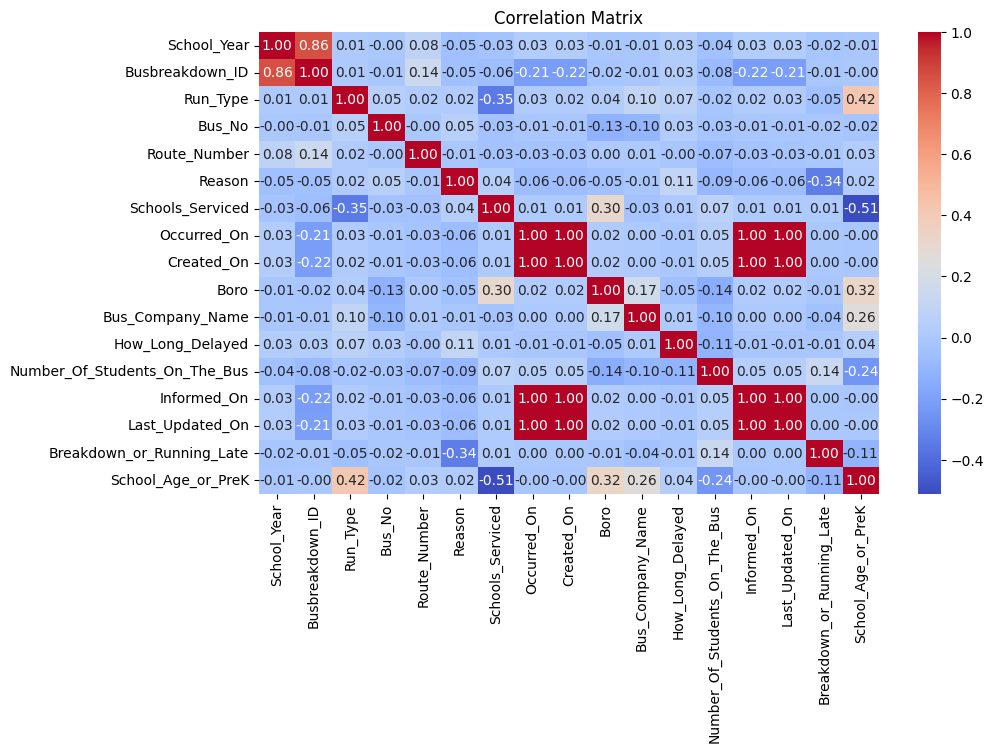

In [34]:
# Correlation matrix for numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
print("\nCorrelation matrix:")
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [48]:
data

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Has_Contractor_Notified_Schools_Yes,Has_Contractor_Notified_Parents_Yes,Have_You_Alerted_OPT_Yes
0,2015-2016,1224901,3,7481,77,Other,5003,56392,61017,1,27,191,5,61017,116763,1,0,True,True,False
1,2015-2016,1225098,3,8114,77,Heavy Traffic,5071,56698,61329,1,27,837,3,61329,117361,1,0,True,True,False
2,2015-2016,1215800,3,4662,209,Heavy Traffic,4969,48207,51829,1,27,335,12,51829,98486,1,0,True,True,True
3,2015-2016,1215511,3,4547,209,Other,4968,48064,51656,1,27,110,11,51656,98208,1,0,True,True,True
4,2015-2016,1215828,3,4554,209,Other,5149,48210,51836,1,27,191,12,51836,98548,1,0,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,3,8138,209,Heavy Traffic,5041,21443,23188,1,27,389,7,23188,47628,1,0,True,True,False
147968,2016-2017,1341521,3,15,479,Heavy Traffic,5056,25138,27087,1,27,618,0,27087,54720,1,0,True,True,False
147969,2016-2017,1353044,9,8642,10880,Heavy Traffic,1350,33560,36071,1,26,692,0,36071,71979,1,1,True,True,True
147970,2016-2017,1353045,9,6145,7663,Won`t Start,3640,33561,36072,7,43,692,0,36072,71978,0,1,True,True,False


In [14]:
data.duplicated().sum()

0

In [35]:
# Features and Target Separation
X = data.drop(['Busbreakdown_ID', 'Breakdown_or_Running_Late'], axis=1)
y = data['Breakdown_or_Running_Late']

In [37]:
# Handling Imbalanced Data using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_resampled contains your resampled features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [40]:
# Define the ANN model
model = Sequential()

# Input Layer and First Hidden Layer
model.add(Dense(units=16, activation='relu', input_shape=(X_scaled.shape[1],)))

# Second Hidden Layer
model.add(Dense(units=8, activation='relu'))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [41]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [42]:
# Training the ANN model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=32, verbose=1)

Epoch 1/3
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7302 - loss: 0.5456 - val_accuracy: 0.7827 - val_loss: 0.4695
Epoch 2/3
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7768 - loss: 0.4695 - val_accuracy: 0.7928 - val_loss: 0.4425
Epoch 3/3
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7952 - loss: 0.4399 - val_accuracy: 0.8050 - val_loss: 0.4312


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [43]:
# Evaluating the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8032 - loss: 0.4330
Test Loss: 0.4333
Test Accuracy: 0.8040


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [44]:
# Make predictions on the test set
predictions = model.predict(X_test)

1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [45]:
predicted_labels = (predictions > 0.5).astype(int).flatten()

In [46]:
# Evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Now calculate the metrics
print("Accuracy:", accuracy_score(y_test, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))
print("Classification Report:\n", classification_report(y_test, predicted_labels))

Accuracy: 0.8039990180982348
Confusion Matrix:
 [[17291  5252]
 [ 3531 18737]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80     22543
           1       0.78      0.84      0.81     22268

    accuracy                           0.80     44811
   macro avg       0.81      0.80      0.80     44811
weighted avg       0.81      0.80      0.80     44811



## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

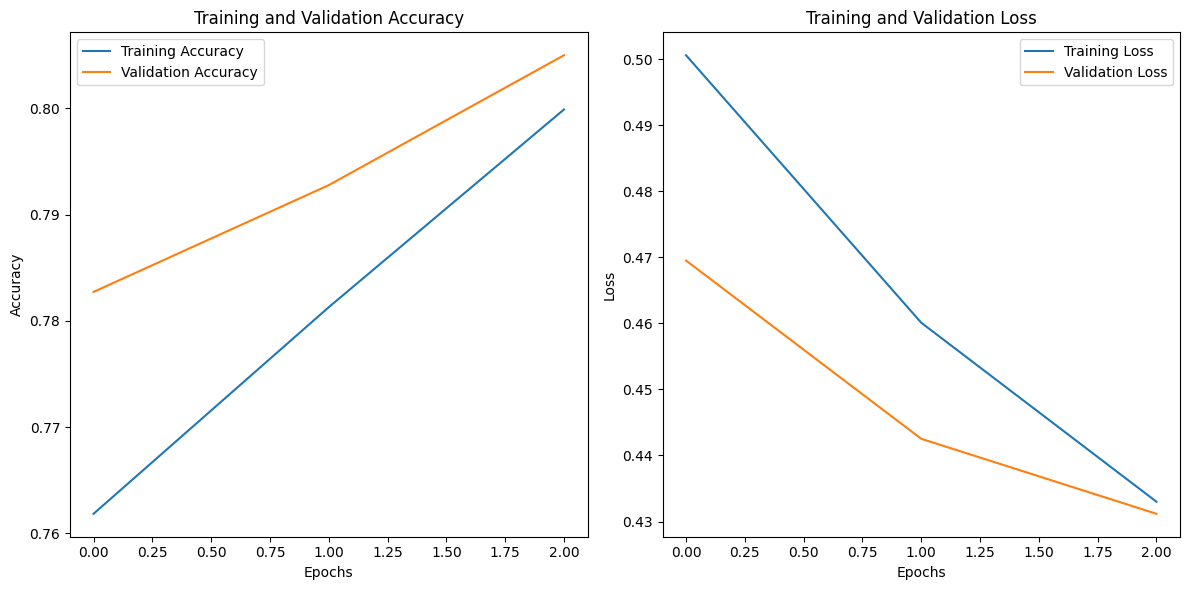

In [47]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Save the Model
Save the trained model for submission.

In [48]:
model.save('my_model.keras')

In [49]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_model.keras')


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: